## (Core) Preparing Time Series from Wide-Form Data
You will be working with Zillow's publicly available Zillow House Value Index (ZHVI) https://www.zillow.com/research/data/

* Specifically, you will be using the Home Value data set for:
    * Data Type = "ZHVI All Homes (SFR+Condo/Coop) - Time Series - Smoothed - Seasonally Adjusted"
    * Geography = "City"
* We have already downloaded the file for you and uploaded it to Google Drive.
    * Share URL: https://drive.google.com/file/d/1O_g44QAfe3uVF-1heAC0BAeVDoWloVR-/view?usp=sharing
    * Direct URL (for Pandas): https://docs.google.com/spreadsheets/d/e/2PACX-1vQN3Ksa9szQuO4G1-msXWAp17KtVHQCBnuEieu_auu1wSiBf3-krHusIx5VBMkihxj-KZLBosDIGEyR/pub?output=csv

### Task
### Part 1

* First, you will prepare the dataset for time series analysis:
    * Load in the Zillow Home Value Index dataframe.
        * Note: it is a large file and may take a minute to load.
    * Filter the 4 largest cities into a new dataframe.
        * Tip: the "SizeRank" column has already ranked the cities by size. The larger the city, the smaller the rank value.
            * Therefore the 4 largest cities would have rank values of [0,1,2,3]
    * Melt the data to long-form and prepare it for time series analysis.
        * Convert the melted dates into datetime datatype.
        * Make the datetime column the index.
    * Resample the dataframe as monthly frequency, grouped by City.

### Part 2

* Once you've prepared the dataframe with the time series data for the 4 largest cities:
    * Plot the home values for all 4 cities. (Hint: use unstack)
        * Make sure to add a title and axis labels.
        * Reformat the y-axis ticks to use thousands of dollars with a "K" at the end. (e.g. "200K, 400K, etc")
            * Hint: use the FuncFormatter from matplotlib.
    * Answer the following 2 questions using pandas:
        * 1) Which City had the highest Typical Home Value at the end of 2008? Which had the least?
            * Hint: You can use the unstacked dataframe or use pd.IndexSlice with the multiindex.
        * 2) How much did the home values change from November 2008 to December 2008 (in dollars)?
            * Hint: you can use .diff() to calculate the change in values

In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticks

### Load in the Zillow Home Value Index dataframe

In [2]:
# Load the data
url="https://docs.google.com/spreadsheets/d/e/2PACX-1vQN3Ksa9szQuO4G1-msXWAp17KtVHQCBnuEieu_auu1wSiBf3-krHusIx5VBMkihxj-KZLBosDIGEyR/pub?output=csv"
df = pd.read_csv(url)
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22467 entries, 0 to 22466
Columns: 281 entries, RegionID to 2022-09-30
dtypes: float64(273), int64(2), object(6)
memory usage: 48.2+ MB


,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0
4,6915,4,San Antonio,city,TX,TX,"San Antonio-New Braunfels, TX",Bexar County,114794.0,114975.0,...,269323.0,274032.0,278464.0,284127.0,289739.0,294776.0,297727.0,298796.0,299124.0,298951.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22462,236350,28439,Palisades,city,TX,TX,"Amarillo, TX",Randall County,NaN,NaN,...,198490.0,198467.0,196420.0,192002.0,191634.0,189383.0,191134.0,191343.0,192384.0,192110.0
22463,40403,28439,Port Mansfield,city,TX,TX,"Raymondville, TX",Willacy County,NaN,NaN,...,229251.0,232984.0,238245.0,240154.0,242470.0,243119.0,249098.0,255572.0,261910.0,264685.0
22464,54740,28439,Tribes Hill,city,NY,NY,"Amsterdam, NY",Montgomery County,53380.0,53662.0,...,132490.0,134951.0,137470.0,137430.0,137413.0,137615.0,138908.0,140096.0,141573.0,142438.0
22465,249186,28439,Derby Center,city,VT,VT,NaN,Orleans County,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,258191.0,261607.0,264571.0,266255.0


### Filter the 4 largest cities into a new dataframe

In [3]:
four_largest_cities = df[df['SizeRank'] < 4]
four_largest_cities

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0


In [4]:
four_largest_cities['RegionName'].unique()

array(['New York', 'Los Angeles', 'Houston', 'Chicago'], dtype=object)

### Melt the data to long-form and prepare it for time series analysis

In [5]:
df_melted = pd.melt(four_largest_cities, id_vars=['RegionName'])
df_melted

,RegionName,variable,value
0,New York,RegionID,6181
1,Los Angeles,RegionID,12447
2,Houston,RegionID,39051
3,Chicago,RegionID,17426
4,New York,SizeRank,0
...,...,...,...
1115,Chicago,2022-08-31,315587.0
1116,New York,2022-09-30,781622.0
1117,Los Angeles,2022-09-30,966595.0
1118,Houston,2022-09-30,272639.0


In [6]:
df_melted = pd.melt(four_largest_cities.drop(columns=['RegionID', 'SizeRank', 'RegionType', 'StateName',
       'State', 'Metro', 'CountyName']),id_vars=['RegionName'],var_name='Date',value_name='ZHVI')
df_melted

,RegionName,Date,ZHVI
0,New York,2000-01-31,253690.0
1,Los Angeles,2000-01-31,234181.0
2,Houston,2000-01-31,109068.0
3,Chicago,2000-01-31,166139.0
4,New York,2000-02-29,255517.0
...,...,...,...
1087,Chicago,2022-08-31,315587.0
1088,New York,2022-09-30,781622.0
1089,Los Angeles,2022-09-30,966595.0
1090,Houston,2022-09-30,272639.0


In [7]:
# Convert the melted dates into datetime datatype
df_melted['Date'] = pd.to_datetime(df_melted['Date'])
df_melted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1092 entries, 0 to 1091
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   RegionName  1092 non-null   object        
 1   Date        1092 non-null   datetime64[ns]
 2   ZHVI        1087 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.7+ KB


In [8]:
# Make the datetime column the index
df_melted = df_melted.set_index('Date')
df_melted

,RegionName,ZHVI
Date,,
2000-01-31,New York,253690.0
2000-01-31,Los Angeles,234181.0
2000-01-31,Houston,109068.0
2000-01-31,Chicago,166139.0
2000-02-29,New York,255517.0
...,...,...
2022-08-31,Chicago,315587.0
2022-09-30,New York,781622.0
2022-09-30,Los Angeles,966595.0


In [9]:
df_melted.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1092 entries, 2000-01-31 to 2022-09-30
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   RegionName  1092 non-null   object 
 1   ZHVI        1087 non-null   float64
dtypes: float64(1), object(1)
memory usage: 25.6+ KB


In [10]:
# interpolate missing values of ZHVI column
df_melted['ZHVI'] = df_melted['ZHVI'].interpolate()

In [11]:
# check if missing values still exist
df_melted.isna().sum()

RegionName    0
ZHVI          0
dtype: int64

### Resample the dataframe as monthly frequency, grouped by City

In [12]:
df_res = df_melted.groupby('RegionName').resample('M').mean()
df_res

ZHVI
RegionName Date                
Chicago    2000-01-31  166139.0
           2000-02-29  166536.0
           2000-03-31  167368.0
           2000-04-30  168826.0
           2000-05-31  170499.0
...                         ...
New York   2022-05-31  768797.0
           2022-06-30  773944.0
           2022-07-31  777692.0
           2022-08-31  779960.0
           2022-09-30  781622.0

[1092 rows x 1 columns]

### Plot the home values for all 4 cities. (Hint: use unstack)
* Make sure to add a title and axis labels.
* Reformat the y-axis ticks to use thousands of dollars with a "K" at the end. (e.g. "200K, 400K, etc")
    * Hint: use the FuncFormatter from matplotlib.

In [13]:
df_unstacked = df_res.unstack(level=0)
df_unstacked

ZHVI                                
RegionName   Chicago   Houston Los Angeles  New York
Date                                                
2000-01-31  166139.0  109068.0    234181.0  253690.0
2000-02-29  166536.0  109079.0    234401.0  255517.0
2000-03-31  167368.0  108878.0    235513.0  257207.0
2000-04-30  168826.0  108881.0    237589.0  260310.0
2000-05-31  170499.0  108834.0    240113.0  263204.0
...              ...       ...         ...       ...
2022-05-31  312487.0  265558.0    990391.0  768797.0
2022-06-30  314663.0  268901.0    992337.0  773944.0
2022-07-31  315910.0  271059.0    992630.0  777692.0
2022-08-31  315587.0  272400.0    978196.0  779960.0
2022-09-30  315429.0  272639.0    966595.0  781622.0

[273 rows x 4 columns]

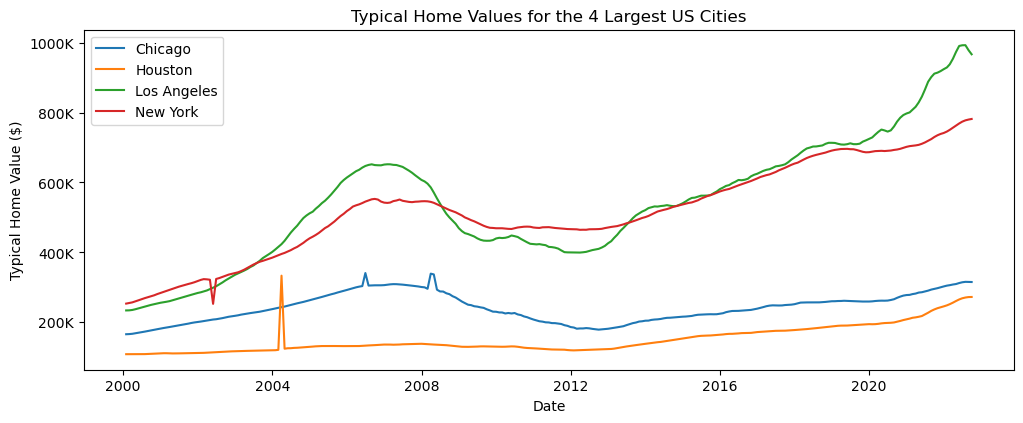

In [14]:
# Define the formatter function
def thousands(x, pos):
    return f'{int(x/1000)}K'

# Create the formatter object using the function
fmt_thous = mticks.FuncFormatter(thousands)

# Create the plot with a specified figure size
fig, ax = plt.subplots(figsize=(12, 5))

# Plot each city's home values
for column in df_unstacked['ZHVI']:
    ax.plot(df_unstacked.index, df_unstacked['ZHVI'][column], label=column)

# Set the title and labels
ax.set_title('Typical Home Values for the 4 Largest US Cities')
ax.set_xlabel('Date')
ax.set_ylabel('Typical Home Value ($)')

# Set the y-axis major formatter to the custom formatter
ax.yaxis.set_major_formatter(fmt_thous)

# Rotate date labels automatically
fig.autofmt_xdate(which='major',rotation=0, ha='center')

# Display the legend
ax.legend()

# Show the plot
plt.show()

### Answer the following 2 questions using pandas:
#### Q1: Which City had the highest Typical Home Value at the end of 2008? Which had the least?
* Hint: You can use the unstacked dataframe or use pd.IndexSlice with the multiindex.

#### Using pd.IndexSlice with the multiindex

In [15]:
# select the data for the end of 2008
end_of_2008_slice = pd.IndexSlice[:, '2008-12-31']
end_of_2008_data = df_res.loc[end_of_2008_slice,'ZHVI']

In [16]:
# City with the highest Typical Home Value at the end of 2008
max_value_city_2008 = end_of_2008_data.idxmax()[0]
max_value_city_2008

'New York'

In [17]:
# City with the lowest Typical Home Value at the end of 2008
min_value_city_2008 = end_of_2008_data.idxmin()[0]
min_value_city_2008

'Houston'

#### Using unstacked dataframe

In [18]:
# select the data for the end of 2008
zhvi_dec_2008 = df_unstacked.loc['2008-12-31', 'ZHVI']

# City with the highest Typical Home Value at the end of 2008
highest_value_city_2008 = zhvi_dec_2008.idxmax()
highest_value_city_2008

'New York'

In [19]:
# City with the lowest Typical Home Value at the end of 2008
lowest_value_city_2008 = zhvi_dec_2008.idxmin()
lowest_value_city_2008

'Houston'

#### Q2: How much did the home values change from November 2008 to December 2008 (in dollars)?
* Hint: you can use .diff() to calculate the change in values

In [20]:
# Select November and December 2008
nov_dec_2008 = df_unstacked['ZHVI'].loc['2008-11-30':'2008-12-31']
nov_dec_2008

RegionName,Chicago,Houston,Los Angeles,New York
Date,,,,
2008-11-30,271059.0,132247.0,481905.0,514767.0
2008-12-31,265306.0,131283.0,469294.0,510309.0


In [21]:
# Calculate the difference between the two months for each city
nov_dec_diff = nov_dec_2008.diff().iloc[-1]

for city, change in nov_dec_diff.items():
    print(f"{city}: ${change:,.0f}")

Chicago: $-5,753
Houston: $-964
Los Angeles: $-12,611
New York: $-4,458
